In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
df = pd.read_csv('Preprocessed_Car_Dheko11.csv')

In [3]:
continuous = df[['Kilometers_Driven', 'No_of_Owners', 'Car_Produced_Year', 'Car_Price',
       'Registration_Year', 'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
       'Wheel_Base', 'No_of_Seats', 'Car_Age']]#numerical variables
#categorical = df[['Fuel_Type', 'Body_Type', 'Manufactured_By', 'Car_Model','Transmission_Type', 'city']]

<Axes: >

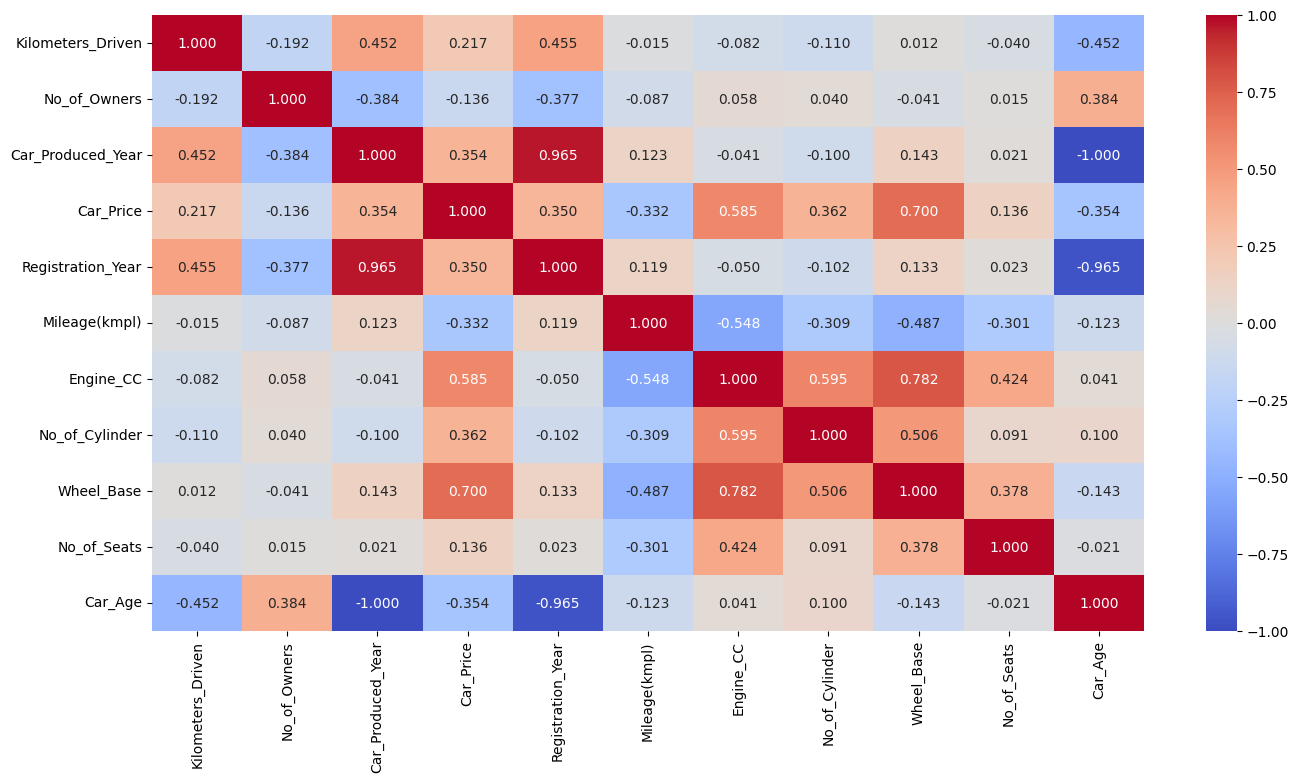

In [4]:
#Detect multicollinearity (features with high correlation)

plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

#-1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation.

Car_Produced_Year vs Registration_Year: 
High positive correlation (~ 0.97), indicating that cars are typically registered close to their production year.
Engine_CC vs Wheel_Base:
Strong positive correlation (~ 0.76), suggesting that larger engines are associated with longer wheelbases.
Car_Price vs Wheel_Base: 
Positive correlation (~ 0.68), implying that cars with larger wheelbases tend to be priced higher.


In [5]:
#Dropping these columns also simplifies the model and reduces the risk
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [5]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Body_Type 7.689735647186243e-274
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Transmission_Type 2.2955423449265863e-38
Fuel_Type city 4.5602432714759726e-36
Body_Type Fuel_Type 7.689735647187117e-274
Body_Type Body_Type 0.0
Body_Type Manufactured_By 0.0
Body_Type Car_Model 0.0
Body_Type Transmission_Type 2.757339330511284e-122
Body_Type city 0.00028729484629058807
Manufactured_By Fuel_Type 0.0
Manufactured_By Body_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By city 7.219237516969048e-34
Car_Model Fuel_Type 0.0
Car_Model Body_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Transmission_Type 0.0
Car_Model city 3.0642025101760962e-52
Transmission_Type Fuel_Type 2.295542344926552e-38
Transmission_Type Body_Type 2.757339330511441e-122
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Transmission

In [7]:
df.head()

,Kilometers_Driven,No_of_Owners,Car_Produced_Year,Car_Price,Mileage(kmpl),Engine_CC,No_of_Cylinder,Wheel_Base,No_of_Seats,Fuel_Type_Cng,...,Car_Model_Volvo XC40,Car_Model_Volvo XC60,Transmission_Type_Automatic,Transmission_Type_Manual,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
0,0.000008,3,2015,400000,23.10,998,3,2425,5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000031,2,2018,811000,17.00,1497,3,2519,5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000084,1,2018,585000,23.84,1199,3,2400,5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000056,1,2014,462000,19.10,1197,4,2425,5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000017,1,2015,790000,23.65,1248,4,2600,5,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
categorical_columns = ['Body_Type','Fuel_Type',  'Manufactured_By', 'Car_Model', 'Transmission_Type', 'city'] # Columns to one-hot encode
numerical_columns = [
    'Kilometers_Driven', 'No_of_Owners', 'Car_Produced_Year', 'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
    'Wheel_Base', 'No_of_Seats'
]  # Numerical columns to scale

In [7]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
X = df.drop('Car_Price',axis = 1)
y = df['Car_Price']

In [125]:
categorical_columns_label = ['Body_Type']  # Columns to label encode
categorical_columns_one_hot = ['Fuel_Type', 'Manufactured_By', 'Car_Model', 'Transmission_Type', 'city'] # Columns to one-hot encode
numerical_columns = [
    'Kilometers_Driven', 'No_of_Owners', 'Car_Produced_Year', 'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
    'Wheel_Base', 'No_of_Seats'
]  # Numerical columns to scale

In [9]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

numerical_columns = [
    'Kilometers_Driven', 'No_of_Owners', 'Car_Produced_Year', 'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
    'Wheel_Base', 'No_of_Seats']
# Scale numerical columns
scaler = MinMaxScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [10]:
from sklearn.preprocessing import MinMaxScaler
import joblib


joblib.dump(scaler, 'scaler.pkl')  # Save the scaler

['scaler.pkl']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5618, 359), (2408, 359), (5618,), (2408,))

In [12]:
X_train.head()

,Kilometers_Driven,No_of_Owners,Car_Produced_Year,Mileage(kmpl),Engine_CC,No_of_Cylinder,Wheel_Base,No_of_Seats,Fuel_Type_Cng,Fuel_Type_Diesel,...,Car_Model_Volvo XC40,Car_Model_Volvo XC60,Transmission_Type_Automatic,Transmission_Type_Manual,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
555,0.051429,0.2,0.714286,0.226615,0.374906,0.50,0.533708,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6763,0.077945,0.4,0.785714,0.257956,0.300275,0.50,0.484551,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1485,0.068078,0.2,0.857143,0.380906,0.375157,0.50,0.442416,0.375,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5737,0.372100,0.2,1.000000,0.265429,0.300275,0.25,0.393258,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1272,0.413444,0.2,0.892857,0.272662,0.546957,0.50,0.428371,0.250,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


LINEAR REGRESSION MODEL

In [22]:
from sklearn.linear_model import LinearRegression

# Initialize the model
models = LinearRegression()

# Fit the model on the training data
models.fit(X_train, y_train)

# Optionally, you can make predictions on the test set
y_pred = models.predict(X_test)

# Display predictions (optional)
y_pred

array([1458688.,  640000.,  599040., ..., 1163264.,  422400.,  228864.])

In [23]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# for evaluation / accuracy--  prediction + y_test
# Display the results
print(f"Mean Absolute Error (MAE): {mae:f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.4f}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE): 1124277405506600.875000
Mean Squared Error (MSE): 759303571703425892906522288062464.00
R-squared: -851790731978514104320.0000
Root Mean Squared Error: 2.755546355450087e+16


RANDOM FOREST

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


model = RandomForestRegressor(random_state=42,n_estimators=350,max_depth=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('root mean square :',r2_score(y_test, y_pred))
a=mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {a:.2f}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 7.593035717034259e+32
root mean square : 0.9121530243377838
Mean Absolute Error (MAE): 119688.96
Root Mean Squared Error: 279836.70176369627


XG BOOST

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Assuming X and y are your features and target variable

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("XGBoost Tuned Results:")
print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
XGBoost Tuned Results:
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error: 51615485492.9709
R-squared Score: 0.9421
Mean Absolute Error: 105240.9717
Root Mean Squared Error: 227190.4168


Gradient boosting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X and y are your features and target variable

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print("Gradient Boosting Regressor Results:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Gradient Boosting Regressor Results:
Mean Squared Error: 90474665242.7685
R-squared Score: 0.8985
Mean Absolute Error: 153092.0699
Root Mean Squared Error: 300790.0684


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


# function to choose the best algorithm

def best_ML_algorithm(X,y,algorithms):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        results = []

        for algorithm in algorithms:

                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                MSE_1=mean_squared_error(y_test,y_pred)
                MAE_1=mean_absolute_error(y_test,y_pred)
                RMSE_1=np.sqrt(mean_squared_error(y_test,y_pred))
                r_squr_1=r2_score(y_test,y_pred)
                results.append({"model": type(model).__name__,
                                          "MAE": MAE_1,
                                          "MSE": MSE_1,
                                          "RMSE": RMSE_1,
                                           "R2": r_squr_1 })
                print(f"Trainscore: {model.score(X_train, y_train)}")
                print(f"Testscore: {model.score(X_test, y_test)}")
                # Plot Actual vs Predicted Prices
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=y_test, y=y_pred)
                plt.xlabel('Actual Prices')
                plt.ylabel('Predicted Prices')
                plt.title(f'{type(model).__name__}: Actual vs Predicted Prices')
                plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Add reference line
                plt.show()
        results_df = pd.DataFrame(results)
        
        return results_df   

In [29]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import xgboost as xgb

def compare_models(X, y):
    # Split the data first
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42, colsample_bytree=1.0, gamma=0, learning_rate=0.3, max_depth=5, n_estimators=300, subsample=0.8),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        
    }
    
    # Dictionary to store results
    results = {}
    
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Store results
        results[name] = {
            'MSE': mse,
            'R2': r2,
            'MAE': mae,
            'RMSE': rmse
        }
    
    # Print results
    for name, metrics in results.items():
        print(f"\n{name} Results:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    
    # Determine the best model
    best_model = max(results, key=lambda x: results[x]['R2'])
    print(f"\nBest model based on R2 score: {best_model}")
    
    return results

# Usage
results = compare_models(X, y)


Linear Regression Results:
MSE: 385765279621686216040095154176.0000
R2: -432753515387381504.0000
MAE: 26913158546596.1211
RMSE: 621100056047080.2500

Random Forest Results:
MSE: 80796909859.8721
R2: 0.9094
MAE: 121208.5560
RMSE: 284247.9725

XGBoost Results:
MSE: 56574127862.0204
R2: 0.9365
MAE: 107556.6928
RMSE: 237853.1645

Gradient Boosting Results:
MSE: 90474665242.7685
R2: 0.8985
MAE: 153092.0699
RMSE: 300790.0684

Best model based on R2 score: XGBoost


MODEL PICKLING

In [30]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'xgb_final_model.pkl')


print("Model saved successfully!")

Model saved successfully!


In [31]:
import joblib

joblib.dump(gb_model, 'gradientboost.pkl')

['gradientboost.pkl']

In [21]:
import joblib

joblib.dump(models, 'xgb.pkl')

['xgb.pkl']

In [32]:
import joblib

joblib.dump(model, 'randomforest.pkl')

['randomforest.pkl']

In [33]:
print(model.feature_names_in_)

['Kilometers_Driven' 'No_of_Owners' 'Car_Produced_Year' 'Mileage(kmpl)'
 'Engine_CC' 'No_of_Cylinder' 'Wheel_Base' 'No_of_Seats' 'Fuel_Type_Cng'
 'Fuel_Type_Diesel' 'Fuel_Type_Electric' 'Fuel_Type_Lpg'
 'Fuel_Type_Petrol' 'Body_Type_' 'Body_Type_Convertibles'
 'Body_Type_Coupe' 'Body_Type_Hatchback' 'Body_Type_Hybrids'
 'Body_Type_MUV' 'Body_Type_Minivans' 'Body_Type_Pickup Trucks'
 'Body_Type_SUV' 'Body_Type_Sedan' 'Body_Type_Wagon'
 'Manufactured_By_Audi' 'Manufactured_By_BMW' 'Manufactured_By_Chevrolet'
 'Manufactured_By_Citroen' 'Manufactured_By_Datsun' 'Manufactured_By_Fiat'
 'Manufactured_By_Ford' 'Manufactured_By_Hindustan Motors'
 'Manufactured_By_Honda' 'Manufactured_By_Hyundai' 'Manufactured_By_Isuzu'
 'Manufactured_By_Jaguar' 'Manufactured_By_Jeep' 'Manufactured_By_Kia'
 'Manufactured_By_Land Rover' 'Manufactured_By_Lexus' 'Manufactured_By_MG'
 'Manufactured_By_Mahindra' 'Manufactured_By_Mahindra Renault'
 'Manufactured_By_Mahindra Ssangyong' 'Manufactured_By_Maruti'
 'Manuf

In [34]:
X_train.head()

,Kilometers_Driven,No_of_Owners,Car_Produced_Year,Mileage(kmpl),Engine_CC,No_of_Cylinder,Wheel_Base,No_of_Seats,Fuel_Type_Cng,Fuel_Type_Diesel,...,Car_Model_Volvo XC40,Car_Model_Volvo XC60,Transmission_Type_Automatic,Transmission_Type_Manual,city_bangalore,city_chennai,city_delhi,city_hyderabad,city_jaipur,city_kolkata
555,0.051429,0.2,0.714286,0.226615,0.374906,0.50,0.533708,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6763,0.077945,0.4,0.785714,0.257956,0.300275,0.50,0.484551,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1485,0.068078,0.2,0.857143,0.380906,0.375157,0.50,0.442416,0.375,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5737,0.372100,0.2,1.000000,0.265429,0.300275,0.25,0.393258,0.375,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1272,0.413444,0.2,0.892857,0.272662,0.546957,0.50,0.428371,0.250,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#read final csv file
df_1=pd.read_csv("Preprocessed_Car_Dheko.csv")
df_1

,Fuel_Type,Body_Type,Kilometers_Driven,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,Transmission_Type,Mileage(kmpl),Engine_CC,No_of_Cylinder,Wheel_Base,No_of_Seats,city,Car_Age
0,4.0,3.0,0.000008,3,20.0,151.0,2015,400000,2015,1.0,23.10,998,3,2425,5,0.0,9
1,4.0,8.0,0.000031,2,6.0,46.0,2018,811000,2018,1.0,17.00,1497,3,2519,5,0.0,6
2,4.0,3.0,0.000084,1,29.0,255.0,2018,585000,2018,1.0,23.84,1199,3,2400,5,0.0,6
3,4.0,9.0,0.000056,1,9.0,82.0,2014,462000,2014,1.0,19.10,1197,4,2425,5,0.0,10
4,1.0,8.0,0.000017,1,20.0,168.0,2015,790000,2015,1.0,23.65,1248,4,2600,5,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8021,4.0,3.0,0.000100,1,20.0,151.0,2022,509999,2022,1.0,25.24,998,3,2435,5,5.0,2
8022,4.0,3.0,0.000008,1,20.0,146.0,2014,180000,2014,1.0,22.74,796,3,2360,5,5.0,10
8023,4.0,9.0,0.000020,3,21.0,183.0,2011,550000,2011,0.0,11.74,1796,4,2760,5,5.0,13
8024,4.0,3.0,0.000025,1,20.0,165.0,2012,140000,2012,1.0,18.50,1197,4,2360,5,5.0,12


In [36]:

df_1.drop(df_1[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [37]:
# x and y data splitting
x_df=df_1.drop(columns=["Car_Price"],axis=1)
y_df=df_1["Car_Price"]

In [38]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,random_state=42)

In [39]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# building pipeline for categorical and numerical data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num=x_df.select_dtypes(include=["int","float"]).columns.to_list()
cat=x_df.select_dtypes(include=["object"]).columns.to_list()

# Define column transformer
preprocessor = ColumnTransformer( 
    transformers=[
        ("numerical", StandardScaler(), num),
        ("categorical", OneHotEncoder(), cat)
    ]
)

catg_preprocessor=Pipeline(steps=[("categorical",enc)])
num_preprocessor=Pipeline(steps=[("numerical",scaler)])

In [31]:
# compose preprocessing techniques
preprocessor=ColumnTransformer([("numerical",num_preprocessor,num),
                                ("categorical",catg_preprocessor,cat)])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('numerical',
                                                  MinMaxScaler())]),
                                 ['Fuel_Type', 'Body_Type', 'Kilometers_Driven',
                                  'No_of_Owners', 'Manufactured_By',
                                  'Car_Model', 'Car_Produced_Year',
                                  'Transmission_Type', 'Mileage(kmpl)',
                                  'Engine_CC', 'No_of_Cylinder', 'Wheel_Base',
                                  'No_of_Seats', 'city']),
                                ('categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder())]),
                                 [])])

In [40]:
#construct pipeline to combine preprocessor and model
pipeline=Pipeline([("preprocessing",preprocessor),
                   ("model",best_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Fuel_Type', 'Body_Type',
                                                   'Kilometers_Driven',
                                                   'No_of_Owners',
                                                   'Manufactured_By',
                                                   'Car_Model',
                                                   'Car_Produced_Year',
                                                   'Transmission_Type',
                                                   'Mileage(kmpl)', 'Engine_CC',
                                                   'No_of_Cylinder',
                                                   'Wheel_Base', 'No_of_Seats',
                                                   'city']),
                                                 ('categorical',
                                                  OneHotEncoder(), [])])),
                ('mode...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [41]:
# fit with dataframe
pipeline.fit(x_df_train,y_df_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['Fuel_Type', 'Body_Type',
                                                   'Kilometers_Driven',
                                                   'No_of_Owners',
                                                   'Manufactured_By',
                                                   'Car_Model',
                                                   'Car_Produced_Year',
                                                   'Transmission_Type',
                                                   'Mileage(kmpl)', 'Engine_CC',
                                                   'No_of_Cylinder',
                                                   'Wheel_Base', 'No_of_Seats',
                                                   'city']),
                                                 ('categorical',
                                                  OneHotEncoder(), [])])),
                ('mode...
                              feature_types=None, gamma=0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=4, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [42]:
# evaluate the pipeline 
y_prediction=pipeline.predict(x_df_test)

MSE_pipe=mean_squared_error(y_df_test,y_prediction)

MAE_pipe=mean_absolute_error(y_df_test,y_prediction)

RMSE_pipe=np.sqrt(mean_squared_error(y_df_test,y_prediction))

r_squr_pipe=r2_score(y_df_test,y_prediction)

# create dataframe to view above evaluation metrics
Rf_Pipe=pd.DataFrame({"model":["XGBoost"],"MAE":[MAE_pipe],"MSE":[MSE_pipe],"RMSE":[RMSE_pipe],"R2":r_squr_pipe})
Rf_Pipe

,model,MAE,MSE,RMSE,R2
0,XGBoost,112911.900965,6.689349e+10,258637.750961,0.9238


In [43]:
x_df.columns

Index(['Fuel_Type', 'Body_Type', 'Kilometers_Driven', 'No_of_Owners',
       'Manufactured_By', 'Car_Model', 'Car_Produced_Year',
       'Transmission_Type', 'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
       'Wheel_Base', 'No_of_Seats', 'city'],
      dtype='object')

In [44]:
x_df.iloc[20]

Fuel_Type               1.00000
Body_Type               9.00000
Kilometers_Driven       0.00001
No_of_Owners            3.00000
Manufactured_By         1.00000
Car_Model              15.00000
Car_Produced_Year    2011.00000
Transmission_Type       0.00000
Mileage(kmpl)          18.48000
Engine_CC            1995.00000
No_of_Cylinder          4.00000
Wheel_Base           2888.00000
No_of_Seats             5.00000
city                    0.00000
Name: 20, dtype: float64

In [45]:
import pickle
with open('pipeline.pkl','wb') as files:
    pickle.dump(pipeline,files)

In [46]:
# FINAL MODEL PREDICTION 
prediction=pipeline.predict(x_df)
print(f"The price of the {x_df['Manufactured_By'].iloc[0]} car is: {round(prediction[0],2)} lakhs")

The price of the 20.0 car is: 349795.90625 lakhs


In [47]:
x_df.to_csv('.csv', index = False)

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBRegressor
import pandas as pd
import pickle

# Load data
df = pd.read_csv("Preprocessed_Car_Dheko.csv")
df.drop(columns=["Car_Age",'Registration_Year'])

# Define feature columns
numerical_features = ['Kilometers_Driven', 'No_of_Owners', 'Car_Produced_Year',
      'Mileage(kmpl)', 'Engine_CC', 'No_of_Cylinder',
       'Wheel_Base', 'No_of_Seats']
categorical_features = ['Fuel_Type', 'Body_Type', 'Manufactured_By', 'Car_Model',
       'Transmission_Type', 'city']

# Preprocessing for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define the model
model = XGBRegressor()

# Create the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", model)
])

# Split data
X = df.drop(columns=["Car_Price"])
y = df["Car_Price"]

# Train the pipeline
pipeline.fit(X, y)

# Save the fitted pipeline
with open("pipeline.pkl", "wb") as file:
    pickle.dump(pipeline, file)
